# Summarizing metrics from single horizontal lines

Leanne Friedrich 08/02/21

## initialization

In [2]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [3]:
import os
import sys
sys.path.append("../")
from py.config import cfg
import py.logs as logs
import py.metrics as me
from printVals import *
from plainIm import plainIm
import matplotlib.pyplot as plt
import metricPlots as mp
import regression as rg
import matplotlib.cm as cm
LOGGERDEFINED = logs.openLog('vidSummaries.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [117]:
ss,u = me.importStillsSummary(diag=True)
seg, useg = me.importStillsSummary(file='segmentsSummary.csv', diag=False)
ss = ss.merge(seg[['folder', 'horiz_segments']], on='folder', suffixes=['', '_manual'])

Independents: ['folder', 'bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['xs_aspect', 'xs_xshift', 'xs_yshift', 'xs_area', 'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'vert_wN', 'vert_hN', 'v

In [5]:
vs,uv = me.importStillsSummary(file='videoSummary.csv', diag=True)

Independents: ['folder', 'bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['projectionN', 'projectionN_N', 'projShiftN', 'projShiftN_N', 'vertDispBotN', 'vertDispBotN_N', 'vertDispTopN', 'vertDis

# horizontal

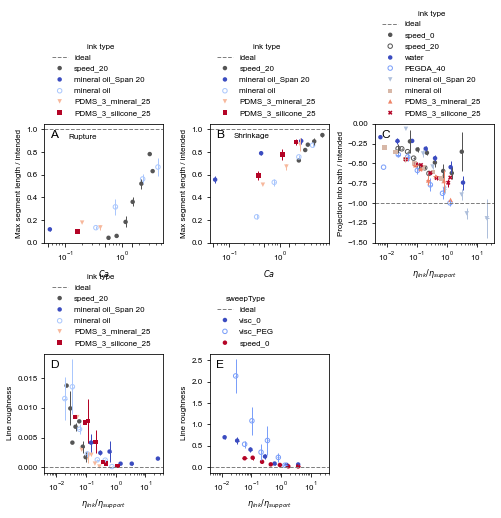

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [176]:
fig,axs = plt.subplots(2,3,figsize=(7, 7))

ssca = ss.copy()
ssca = ssca[ssca.sigma>0]
ssca = ssca.sort_values(by='sigma')
ss0 = ss.copy()
ss0 = ss0[ss0.sigma==0]
vsca = vs.copy()
vsca = vsca.sort_values(by='sigma')
for ssi in [ssca, ss0, vsca]:
    mp.simplifyType(ssi)

fs = 8
ms = 20

# rupture
kwargs = {'logx':True, 'legend':True, 'units':u, 'dx':0.15, 'yideal':1, 'fontsize':fs, 'markersize':ms}
mp.sweepTypeSS(ssca[ssca.horiz_segments_manual>3], 'int_Ca', 'horiz_maxlenN', ax=axs[0][0], **kwargs)
axs[0][0].text(0.2, 0.92, 'Droplets (>3/3 segments)', fontsize=fs, transform=axs[0][0].transAxes, horizontalalignment='left', verticalalignment='top')

# shrinkage
mp.sweepTypeSS(ssca[ssca.horiz_segments_manual==3], 'int_Ca', 'horiz_maxlenN', ax=axs[0][1], **kwargs)
axs[0][1].text(0.2, 0.92, 'Contracting (3/3 segments)', fontsize=fs, transform=axs[0][1].transAxes, horizontalalignment='left', verticalalignment='top')

for ax in [axs[0][0], axs[0][1]]:
    ax.set_ylim([0, 1.05])
    mp.setSquare(ax)
    ax.set_ylabel('Max segment length / intended')
    

# projectionN
kwargs['yideal'] = -1
mp.sweepTypeSS(vsca, 'viscRatio', 'projectionN', ax=axs[0][2], **kwargs)
for ax in [axs[0][2]]:
    ax.set_ylim([-1.5, 0])
    mp.setSquare(ax)
    ax.set_ylabel('Projection into bath / intended')

# roughness
kwargs['yideal'] = 0
mp.sweepTypeSS(ssca[ssca.horiz_segments_manual==3], 'viscRatio', 'horiz_roughness', ax=axs[1][0], **kwargs)
mp.sweepTypeSS(ss0[ss0.horiz_segments_manual==3], 'viscRatio', 'horiz_roughness', ax=axs[1][1], **kwargs)
for ax in [axs[1][0], axs[1][1]]:
    ax.set_ylabel('Line roughness')
    ax.set_xlim([4*10**-3, 4*10**1])
    ax.set_xticks([ 10**-2, 10**-1, 10**0, 10**1])
    mp.setSquare(ax)


for ax in [axs[0][2], axs[1][0],axs[1][1]]:
    ax.set_xlabel('${\eta}_{ink}/{\eta}_{support}$', fontsize=fs)
for ax in [axs[0][0], axs[0][1]]:
    ax.set_xlabel('$Ca$', fontsize=fs)
    
axs[1][2].remove()

fig.tight_layout()
mp.subFigureLabels(axs)
fig.savefig(os.path.join(cfg.path.fig, 'figures', 'horiz_measures.svg'), bbox_inches='tight', dpi=300)

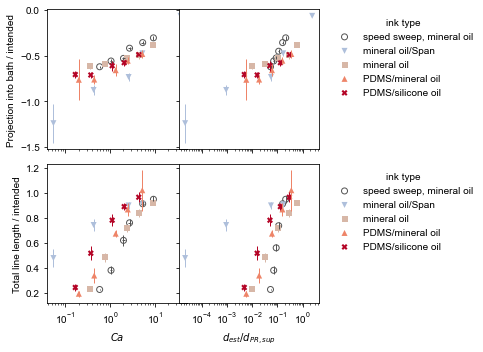

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [202]:
vs0 = vs.copy()
mp.simplifyType(vs0)
# vs0 = vs0[vs0.sigma>0]
vs0.sort_values(by='sigma', inplace=True)
me.plainTypes(vs0)
ss0 = ss.copy()
mp.simplifyType(ss0)
# ss0 = ss0[ss0.sigma>0]
ss0.sort_values(by='sigma', inplace=True)
me.plainTypes(ss0)
fig,axs = plt.subplots(2,2, figsize=(6.5,5), sharey='row', sharex='col')
for i,xvar in enumerate(['int_Ca', 'sup_dnorm']):
    mp.sweepTypeSS(vs0, xvar, 'projectionN', logx=True, dx=0.2, ax=axs[0][i], legend=(i==1), legendloc='right')
    axs[0][i].set_ylabel('Projection into bath / intended')
for i,xvar in enumerate(['int_Ca', 'sup_dnorm']):
    mp.sweepTypeSS(ss0, xvar, 'horiz_totlenN', logx=True, dx=0.2, ax=axs[1][i], legend=(i==1), legendloc='right')
    axs[1][i].set_ylabel('Total line length / intended')
axs[1][0].set_xlabel('$Ca$')
axs[1][1].set_xlabel('$d_{est}/d_{PR,sup}$')
axs[0][1].set_ylabel('')
axs[1][1].set_ylabel('')
axs[0][0].set_xlabel('')
axs[0][1].set_xlabel('')
plt.subplots_adjust(wspace=0, hspace=0)
fig.tight_layout()

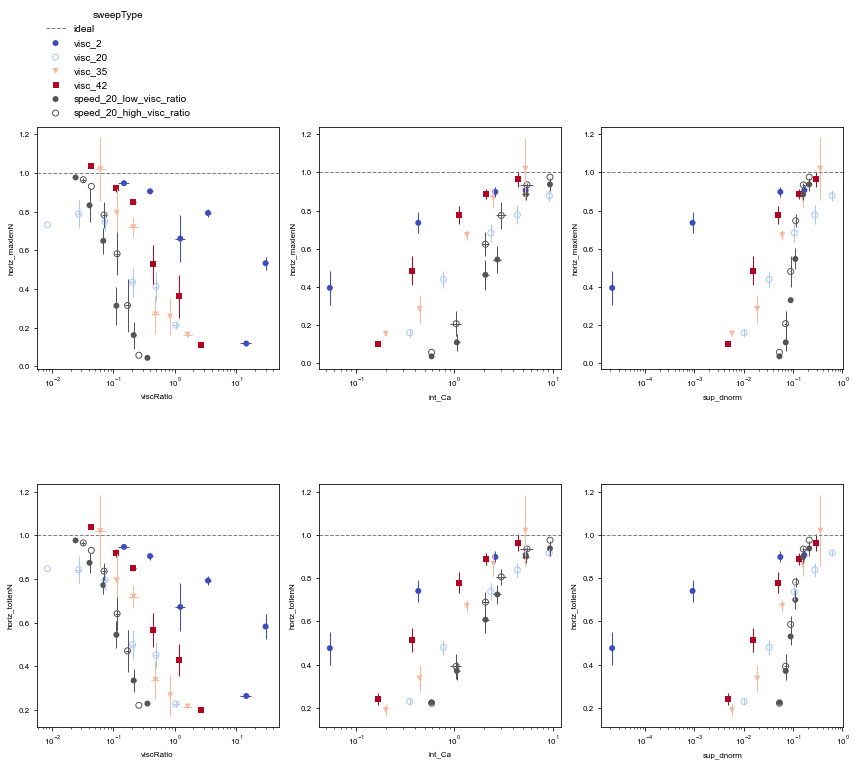

In [120]:
ss1 = ss.copy()
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(2,3,figsize=(12,12))
for j,s2 in enumerate(['viscRatio', 'int_Ca', 'sup_dnorm']):
    for i,s in enumerate(['horiz_maxlenN', 'horiz_totlenN']):
        mp.scatterSS(ss1[ss1.sweepType.str.startswith('visc')], s2, s, 'sweepType', logx=True, yideal=([1,1][i]), ax=axs[i][j], fig=fig, legend=(i==0 and j==0), dx=0.2)
        mp.scatterSS(ss1[ss1.sweepType.str.startswith('speed')], s2, s, 'sweepType', logx=True, ax=axs[i][j], fig=fig, legend=(i==0 and j==0), color='#555555', dx=0.2)
fig.tight_layout()

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'horiz_totlenN'}, xlabel='ink_val', ylabel='sup_val'>)

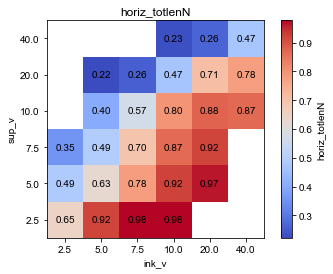

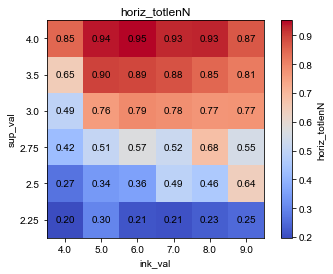

In [157]:
mp.colorMeshSS(ss[ss.sweepType=='speed_20_low_visc_ratio'], 'ink_v', 'sup_v', 'horiz_totlenN', dx=0, dy=0)
mp.colorMeshSS(ss[ss.sweepType=='visc_20'], 'ink_val', 'sup_val', 'horiz_totlenN', dx=0, dy=0)

In [145]:
ss[(ss.sweepType=='speed_20_low_visc_ratio')&(ss.ink_v==10)][['bn', 'sup_v', 'ink_v', 'horiz_totlenN']]

,bn,sup_v,ink_v,horiz_totlenN
282,I_M5_S_3.00_VI_10_VS_10_211005,10.0,10.0,0.80
283,I_M5_S_3.00_VI_10_VS_2.5_211005,2.5,10.0,0.98
284,I_M5_S_3.00_VI_10_VS_20_211005,20.0,10.0,0.47
285,I_M5_S_3.00_VI_10_VS_40_211005,40.0,10.0,0.23
286,I_M5_S_3.00_VI_10_VS_5_211005,5.0,10.0,0.92
287,I_M5_S_3.00_VI_10_VS_7.5_211005,7.5,10.0,0.87


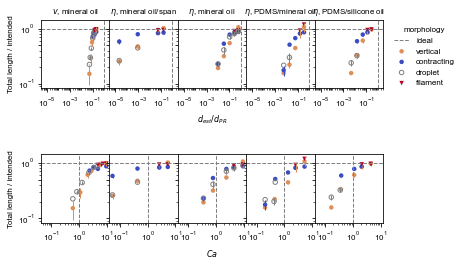

In [162]:
ss1 = ss.copy()
ss1 = ss1[ss1.sigma>0]

mp.simplifyType(ss1)
ss1 = ss1.sort_values(by='sweepType')
ss1['morphology'] = ['droplet' if row['horiz_segments_manual']>3 else ('filament' if row['horiz_totlenN']>0.9 else 'contracting') for i,row in ss1.iterrows()]
ss1 = ss1.sort_values(by=['morphology', 'sweepType'])
ss1['vert_morphology'] = 'vertical'
fig,axs = plt.subplots(2,5, figsize=(6.5,4.1), sharex='row', sharey=True)
ms = 20
fs=8
for i,st in enumerate(ss1.sweepType.unique()):
    for j,xvar in enumerate(['sup_dnorm', 'int_Ca']):
        kwargs = {'logx':True, 'logy':True, 'ax':axs[j][i], 'fig':fig, 'legend':((j==0) and (i==4)), 'markersize':ms, 'fontsize':fs, 'legendloc':'right'}
        mp.scatterSS(ss1[(ss1.sweepType==st)], xvar, 'vert_hN', 'vert_morphology', dx=0.2, dy=1, color='#de8f57', **kwargs)
        mp.scatterSS(ss1[(ss1.sweepType==st)], xvar, 'horiz_totlenN', 'morphology', dx=0.2, dy=1, yideal=1, xideal=1, **kwargs)
        if j==0:
            axs[j][i].set_title(st, fontsize=fs)
        if i>0:
            axs[j][i].set_ylabel('')
        axs[j][i].set_xlabel('')

for ax in axs[0]:
    ax.set_xlim([3*10**-6, 3])
    mp.fixTicks(ax, True,True)
for axrow in axs:
    for ax in axrow:
        mp.setSquare(ax)
    axrow[0].set_ylabel('Total length / intended')
axs[0][2].set_xlabel('$d_{est}/d_{PR}$')
axs[1][2].set_xlabel('$Ca$')
axs[0][0].set_title('$v$, mineral oil', fontsize=fs)
axs[0][1].set_title('$\eta$, mineral oil/span', fontsize=fs)
axs[0][2].set_title('$\eta$, mineral oil', fontsize=fs)
axs[0][3].set_title('$\eta$, PDMS/mineral oil', fontsize=fs)
axs[0][4].set_title('$\eta$, PDMS/silicone oil', fontsize=fs)
fig.tight_layout()
plt.subplots_adjust(wspace=0)
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'line_lengths.pdf'), bbox_inches='tight', dpi=300)

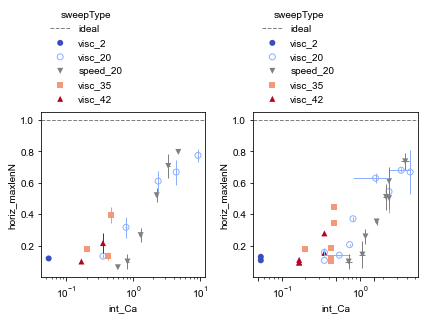

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [38]:
ss1 = ss.copy()
mp.simplifyType(ss1)
ss1 = ss1[ss1.sigma>0]
ss1 = ss1[ss1.horiz_segments_manual>3]
ss1 = ss1.sort_values(by='sigma')
fig,ax = plt.subplots(1,2)
mp.scatterSS(ss1, 'int_Ca', 'horiz_maxlenN', 'sweepType', ax=ax[0], logx=True, logy=False, yideal=1, dx=0.2, grid=True)
mp.scatterSS(ss1, 'int_Ca', 'horiz_maxlenN', 'sweepType', ax=ax[1], logx=True, logy=False, yideal=1, dx=0.1, grid=False)
fig.tight_layout()

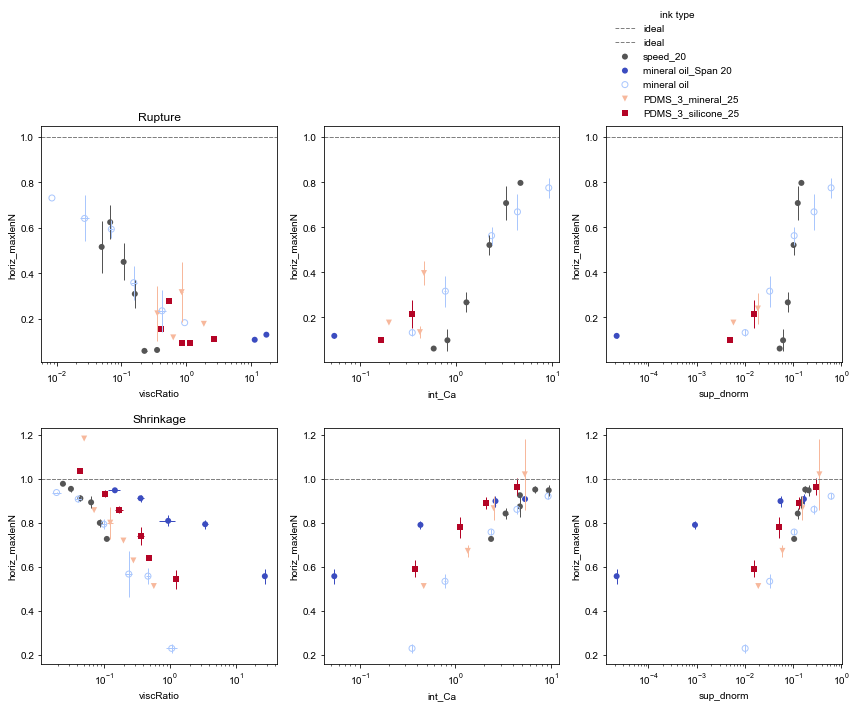

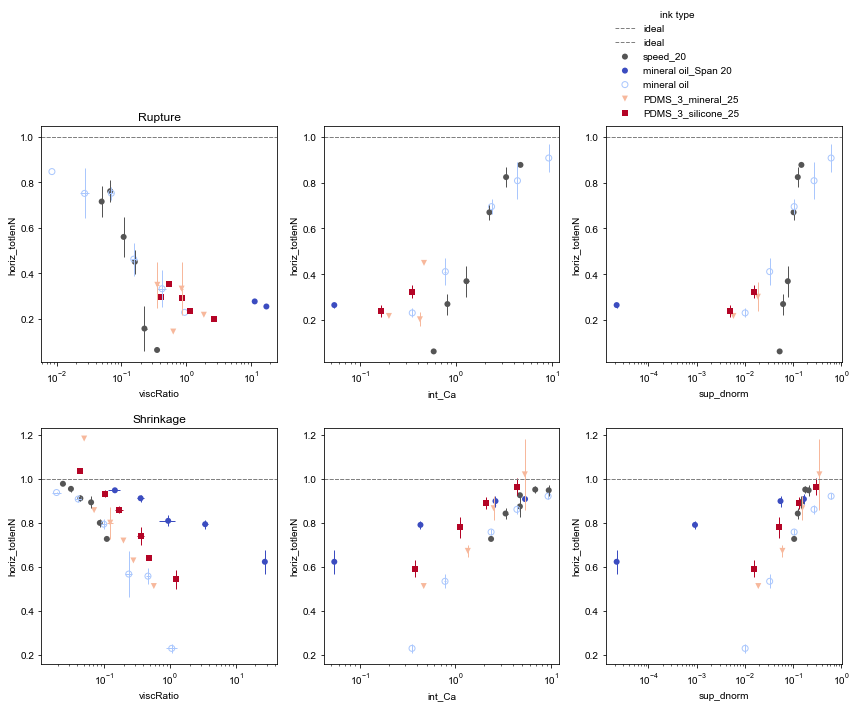

In [65]:
for yvar in ['horiz_maxlenN', 'horiz_totlenN']:
    ss1 = ss.copy()
    mp.simplifyType(ss1)
    ss1 = ss1[ss1.sigma>0]
    ss1 = ss1[ss1.horiz_segments_manual>3]
    ss2 = ss.copy()
    mp.simplifyType(ss2)
    ss2 = ss2[ss2.sigma>0]
    ss2 = ss2[ss2.horiz_segments_manual==3]
    ss1 = ss1.sort_values(by='sigma')
    ss2 = ss2.sort_values(by='sigma')
    fig,axs = plt.subplots(2,3,figsize=(12,10))
    for j,s2 in enumerate(['viscRatio', 'int_Ca', 'sup_dnorm']):
        for i,ssi in enumerate([ss1,ss2]):
            mp.sweepTypeSS(ssi, s2, yvar, logx=True, logy=False, yideal=1, ax=axs[i][j], fig=fig, legend=((j==2)&(i==0)), dx=0.2)
    axs[0][0].set_title('Rupture')
    axs[1][0].set_title('Shrinkage')
    fig.tight_layout()

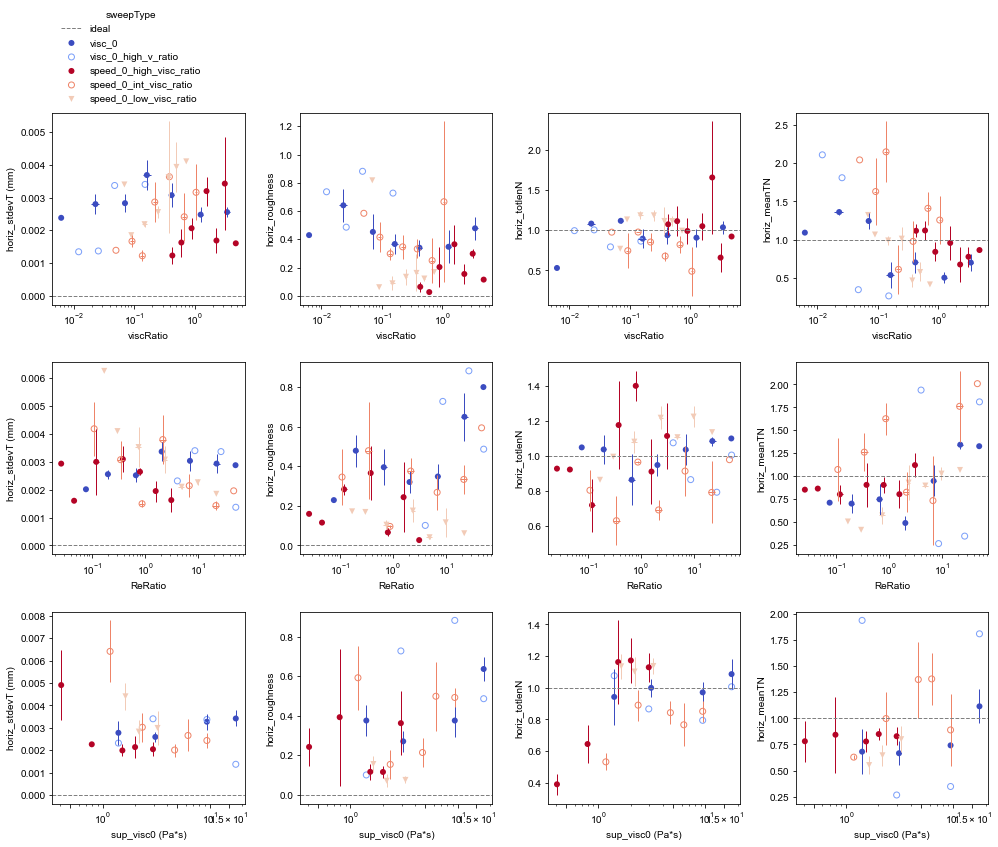

In [40]:
ss1 = ss.copy()
ss1 = ss1[ss1.sigma==0]
ss1 = ss1[ss1.sweepType!='visc_PEG']
ss1 = ss1.sort_values(by='sweepType')
ss1['horiz_stdevT'] = ss1['horiz_stdevTN']*ss1['dEst']
u['horiz_stdevT'] = 'mm'
fig,axs = plt.subplots(3,4,figsize=(14, 12))
for j,s2 in enumerate(['viscRatio', 'ReRatio', 'sup_visc0']):
    for i,s in enumerate(['horiz_stdevT','horiz_roughness', 'horiz_totlenN', 'horiz_meanTN']):
        mp.sweepTypeSS(ss1, s2, s, logx=True, yideal=([0,0,1,1,3][i]), ax=axs[j][i], fig=fig, legend=(i==0 and j==0), dx=0.15, units=u, grid=True)
fig.tight_layout()

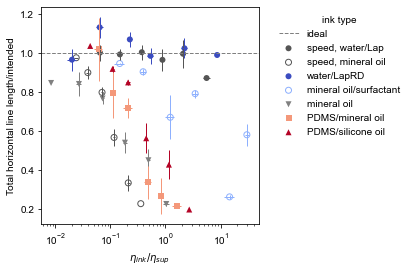

<Figure size 432x288 with 0 Axes>

In [182]:
ss1 = ss.copy()
mp.simplifyType(ss1)
ss1 = ss1[ss1.ink_type!='PEGDA_40']
ss1.sort_values(by='sigma', inplace=True)
fig,ax = plt.subplots(1,1)
ss1.loc[ss1.sweepType=='speed_0', 'sweepType'] = 'speed, water/Lap'
ss1.loc[ss1.sweepType=='speed_20', 'sweepType'] = 'speed, mineral oil'
ss1.loc[ss1.ink_type=='water', 'ink_type'] = 'water/LapRD'
ss1.loc[ss1.ink_type=='mineral oil_Span 20', 'ink_type'] = 'mineral oil/surfactant'
ss1.loc[ss1.ink_type=='PDMS_3_mineral_25', 'ink_type'] = 'PDMS/mineral oil'
ss1.loc[ss1.ink_type=='PDMS_3_silicone_25', 'ink_type'] = 'PDMS/silicone oil'
mp.sweepTypeSS(ss1, 'viscRatio', 'horiz_totlenN', logx=True, yideal=1, dx=0.2 ,ax=ax, legendloc='right')
ax.set_xlabel('$\eta_{ink}/\eta_{sup}$')
ax.set_ylabel('Total horizontal line length/intended')
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'viscRatio_totlenN.pdf'), bbox_inches='tight', dpi=300)

Text(0, 0.5, 'Total horizontal line length/intended')

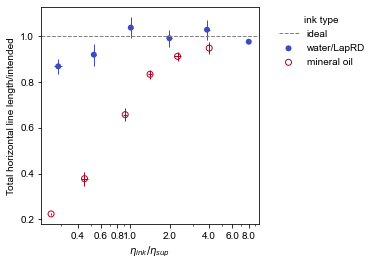

<Figure size 432x288 with 0 Axes>

In [183]:
ss1 = ss.copy()
mp.simplifyType(ss1)
ss1 = ss1[ss1.ink_type!='PEGDA_40']
ss1.sort_values(by='sigma', inplace=True)
fig,ax = plt.subplots(1,1)
ss1.loc[ss1.sweepType=='speed_0', 'sweepType'] = 'speed, water/Lap'
ss1.loc[ss1.sweepType=='speed_20', 'sweepType'] = 'speed, mineral oil'
ss1.loc[ss1.ink_type=='water', 'ink_type'] = 'water/LapRD'
ss1.loc[ss1.ink_type=='mineral oil_Span 20', 'ink_type'] = 'mineral oil/surfactant'
ss1.loc[ss1.ink_type=='PDMS_3_mineral_25', 'ink_type'] = 'PDMS/mineral oil'
ss1.loc[ss1.ink_type=='PDMS_3_silicone_25', 'ink_type'] = 'PDMS/silicone oil'
mp.scatterSS(ss1[ss1.sweepType.str.startswith('speed')], 'vRatio', 'horiz_totlenN', 'ink_type', logx=True, yideal=1, dx=0.2 ,ax=ax, legendloc='right')
ax.set_xlabel('$\eta_{ink}/\eta_{sup}$')
ax.set_ylabel('Total horizontal line length/intended')
# fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'viscRatio_totlenN.pdf'), bbox_inches='tight', dpi=300)

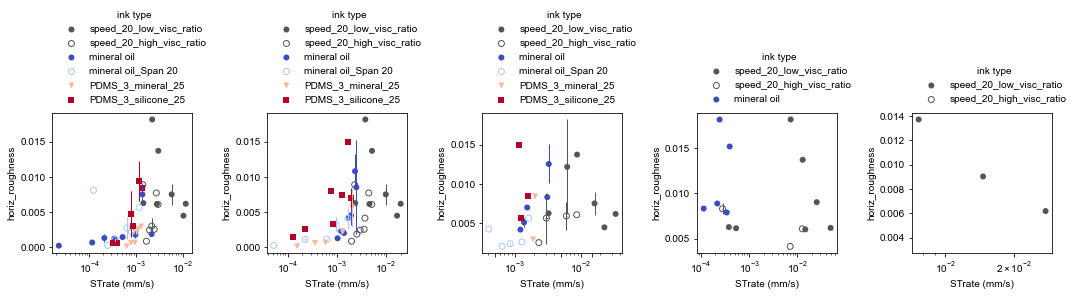

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [42]:
ssca = ss.copy()
ssca = ssca[ssca.sigma>0]
ssca.sort_values(by='sigma')
ssca = ssca[ssca.horiz_roughness_SE<0.1]
ssca = ssca[ssca.horiz_segments_manual==3]

u['STrate'] = 'mm/s'
fig,axs = plt.subplots(1, 5, figsize=(15, 4))
for i, ki in enumerate([-3.5, -3.25, -3, -2.75, -2.5]):
    k = 10**ki
    ssca['STrate'] = (k*ssca['ink_v']*(ssca['sup_visc0']-ssca['ink_visc0'])-k**3*ssca['sigma']/(ssca['dEst']/1000)**2)/(ssca['ink_visc0']+ssca['sup_visc0'])
    mp.sweepTypeSS(ssca, 'STrate', 'horiz_roughness', ax=axs[i], logx=True, units=u)
fig.tight_layout()

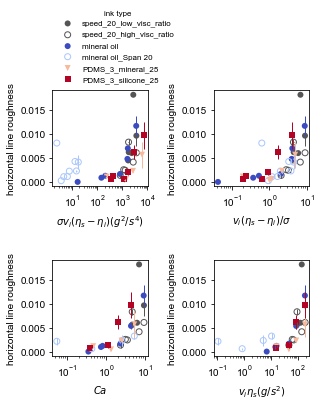

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [43]:
ssca = ss.copy()
ssca = ssca[ssca.sigma>0]
ssca.sort_values(by='sigma')
ssca = ssca[ssca.horiz_roughness_SE<0.1]
ssca = ssca[ssca.horiz_segments_manual==3]
fig,axs = plt.subplots(2,2, figsize=(4.5,6), sharey=False)

ssca['STrate'] = ssca['ink_v']*(ssca['sup_visc0']-ssca['ink_visc0'])*ssca['sigma']
u['STrate'] = 'g^2/s^4'
mp.sweepTypeSS(ssca, 'STrate', 'horiz_roughness',  logx=True, units=u, ax=axs[0][0], legend=True, fontsize=8)
axs[0][0].set_xlabel('$\sigma v_{i} (\eta_s-\eta_i) (g^2/s^4)$')

ssca['STrate'] = ssca['ink_v']*(ssca['sup_visc0']-ssca['ink_visc0'])/ssca['sigma']
u['STrate'] = ''
mp.sweepTypeSS(ssca, 'STrate', 'horiz_roughness',  logx=True, units=u, ax=axs[0][1], legend=False, fontsize=8)
axs[0][1].set_xlabel('$v_{i} (\eta_s-\eta_i)/\sigma $')

mp.sweepTypeSS(ssca, 'int_Ca', 'horiz_roughness',  logx=True, units=u, ax=axs[1][0], legend=False, fontsize=8)
axs[1][0].set_xlabel('$Ca$')

ssca['STrate'] = ssca['ink_v']*(ssca['sup_visc0'])
u['STrate'] = 'g/s^2'
mp.sweepTypeSS(ssca, 'STrate', 'horiz_roughness',  logx=True, units=u, ax=axs[1][1], legend=False, fontsize=8)
axs[1][1].set_xlabel('$v_i \eta_s (g/s^2)$')

for axrow in axs:
    for ax in axrow:
        ax.set_ylabel('horizontal line roughness')
fig.tight_layout()

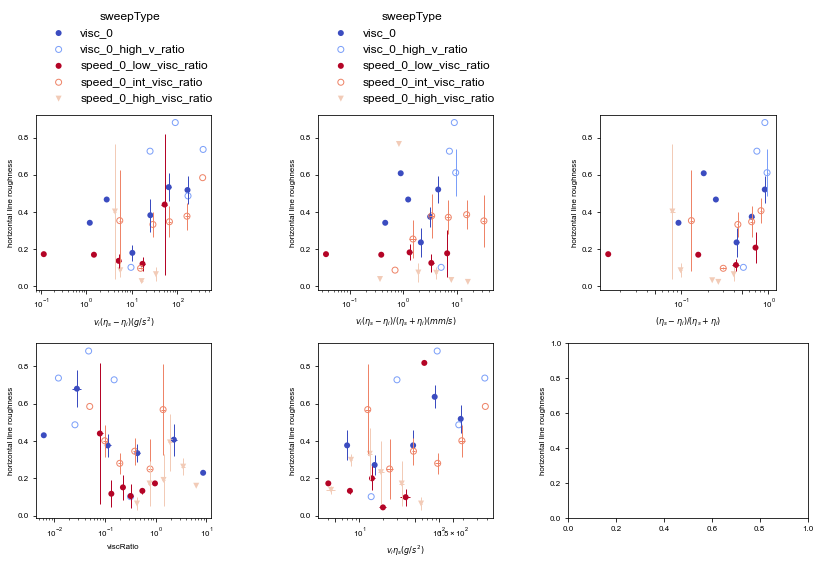

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [44]:
ssca = ss.copy()
ssca = ssca[ssca.sigma==0]
ssca = ssca[ssca.ink_type!='PEGDA_40']
ssca.sort_values(by='sweepType')
# ssca = ssca[ssca.horiz_roughness_SE<0.1]
ssca = ssca[ssca.horiz_segments_manual==3]
fig,axs = plt.subplots(2,3, figsize=(12,8), sharey=False)
fs = 12
ssca['STrate'] = ssca['ink_v']*(ssca['sup_visc0']-ssca['ink_visc0'])
u['STrate'] = 'g^2/s^4'
mp.sweepTypeSS(ssca, 'STrate', 'horiz_roughness',  logx=True, units=u, ax=axs[0][0], legend=True, fontsize=fs, dx=0.2)
axs[0][0].set_xlabel('$v_{i} (\eta_s-\eta_i) (g/s^2)$')

ssca['STrate'] = ssca['ink_v']*(ssca['sup_visc0']-ssca['ink_visc0'])/(ssca['sup_visc0']+ssca['ink_visc0'])
u['STrate'] = 'g^2/s^4'
mp.sweepTypeSS(ssca, 'STrate', 'horiz_roughness',  logx=True, units=u, ax=axs[0][1], legend=True, fontsize=fs, dx=0.2)
axs[0][1].set_xlabel('$v_{i} (\eta_s-\eta_i)/(\eta_s+\eta_i) (mm/s)$')

ssca['STrate'] = (ssca['sup_visc0']-ssca['ink_visc0'])/(ssca['sup_visc0']+ssca['ink_visc0'])
u['STrate'] = 'g^2/s^4'
mp.sweepTypeSS(ssca, 'STrate', 'horiz_roughness',  logx=True, units=u, ax=axs[0][2], legend=False, fontsize=fs, dx=0.2)
axs[0][2].set_xlabel('$(\eta_s-\eta_i)/(\eta_s+\eta_i)$')

mp.sweepTypeSS(ssca, 'viscRatio', 'horiz_roughness', logx=True, units=u, ax=axs[1][0], legend=False, fontsize=fs, dx=0.2)

ssca['STrate'] = ssca['ink_v']*(ssca['sup_visc0'])
u['STrate'] = 'g/s^2'
mp.sweepTypeSS(ssca, 'STrate', 'horiz_roughness',  logx=True, units=u, ax=axs[1][1], legend=False, fontsize=fs, dx=0.2)
axs[1][1].set_xlabel('$v_i \eta_s (g/s^2)$')

for axrow in axs:
    for ax in axrow:
        ax.set_ylabel('horizontal line roughness')
fig.tight_layout()

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='vv', ylabel='horiz_roughness'>)

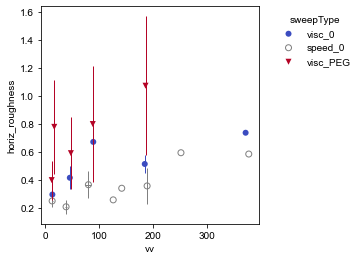

In [57]:
sslap['vv'] = sslap['sup_visc0']*sslap['ink_v']
mp.scatterSS(sslap, 'vv', 'horiz_roughness', 'sweepType')

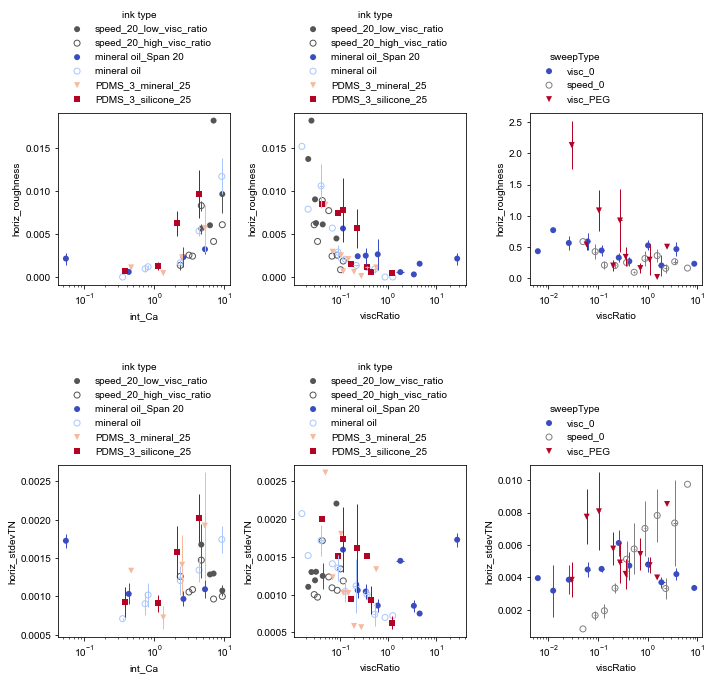

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [56]:
ssca = ss.copy()
ssca = ssca[ssca.sigma>0]
ssca.sort_values(by='sigma', inplace=True)
sslap = ss.copy()
sslap = sslap[sslap.sigma==0]
mp.simplifyType(sslap)
sslap.sort_values(by='sigma', inplace=True)
sslap = sslap[sslap.horiz_segments_manual==3]
# ssca = ssca[ssca.horiz_roughness_SE<0.1]
ssca = ssca[ssca.horiz_segments_manual==3]
fig,axs = plt.subplots(2,3, figsize=(10,10))
for i,yvar in enumerate(['horiz_roughness', 'horiz_stdevTN']):
    for j, xvar in enumerate(['int_Ca', 'viscRatio']):
        mp.sweepTypeSS(ssca, xvar, yvar, ax=axs[i][j], logx=True, units=u)
for i,yvar in enumerate(['horiz_roughness', 'horiz_stdevTN']):
    mp.scatterSS(sslap, 'viscRatio', yvar, 'sweepType', ax=axs[i][2], logx=True, units=u)
fig.tight_layout()

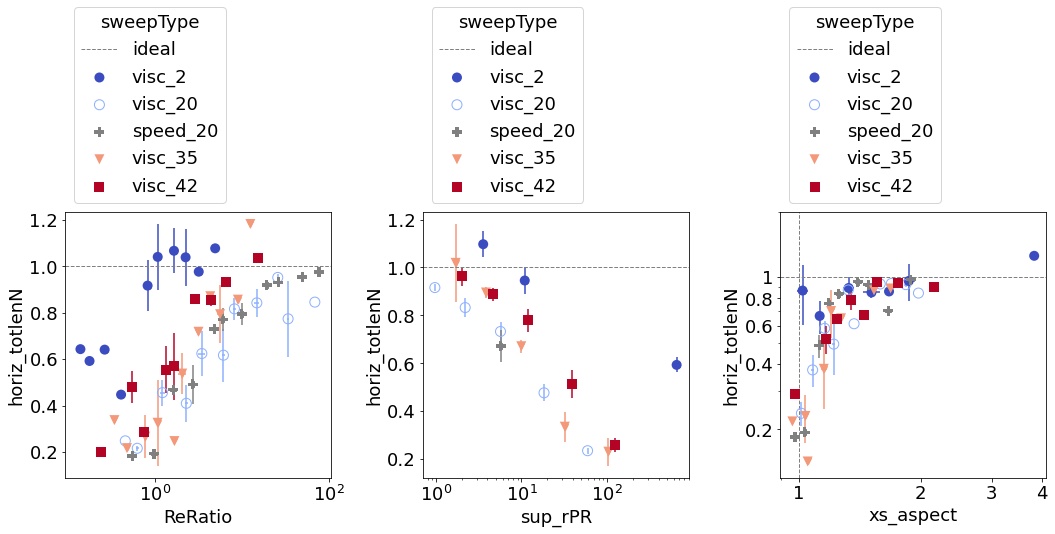

In [55]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
# ss1 = ss1[ss1.horiz_roughness<0.05]
ss1 = ss1.sort_values(by='sweepType', ascending=False)
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(1,3,figsize=(15, 10))

mp.scatterSS(ss1, 'ReRatio', 'horiz_totlenN', 'sweepType', logx=True, yideal=(1), ax=axs[0], fig=fig, legend=True,  markersize=100, fontsize=18)
mp.scatterSS(ss1, 'sup_rPR', 'horiz_totlenN', 'sweepType', logx=True, yideal=(1), ax=axs[1], fig=fig, legend=True,  markersize=100, fontsize=18)
mp.scatterSS(ss1, 'xs_aspect', 'horiz_totlenN', 'sweepType', logx=True, logy=True, yideal=(1), xideal=1, ax=axs[2], fig=fig, legend=True,  markersize=100, fontsize=18)
axs[2].set_xticks([1,2,3,4])
axs[2].set_xticklabels([1,2,3,4])
axs[2].set_ylim([0.12, 2])
axs[2].set_yticks([0.2, 0.4, 0.6, 0.8, 1])
axs[2].set_yticklabels([0.2, 0.4, 0.6, 0.8, 1])
mp.setSquare(axs[2])
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'ppt figures', 'horiz_totlen.svg'), bbox_inches='tight', dpi=300)

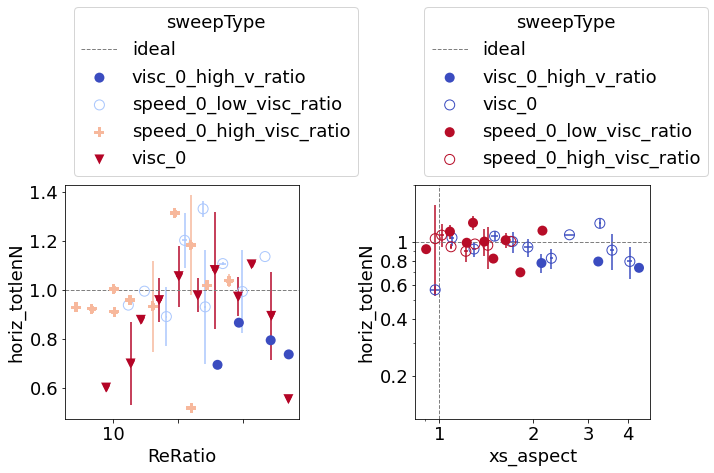

In [52]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.ink_base=='water']
ss1 = ss1[ss1.horiz_totlenN>0.5]
ss1 = ss1[ss1.horiz_totlenN_SE<0.5]
# ss1 = ss1[ss1.horiz_roughness<0.05]
ss1 = ss1.sort_values(by='sweepType', ascending=False)
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(1,2,figsize=(10, 10))
mp.scatterSS(ss1, 'ReRatio', 'horiz_totlenN', 'sweepType', logx=True, yideal=(1), ax=axs[0], fig=fig, legend=True,  markersize=100, fontsize=18)
mp.sweepTypeSS(ss1, 'xs_aspect', 'horiz_totlenN', logx=True, logy=True, yideal=(1), xideal=1, ax=axs[1], fig=fig, legend=True,  markersize=100, fontsize=18)
axs[0].set_xticks([0.1, 1, 10], minor=True)
axs[0].set_xticklabels([0.1, 1, 10])
axs[1].set_xticks([1,2,3,4])
axs[1].set_xticklabels([1,2,3,4])
axs[1].set_ylim([0.12, 2])
axs[1].set_yticks([0.2, 0.4, 0.6, 0.8, 1])
axs[1].set_yticklabels([0.2, 0.4, 0.6, 0.8, 1])
mp.setSquare(axs[1])
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'ppt figures', 'horiz_totlen_0.svg'), bbox_inches='tight', dpi=300)

In [32]:
me.printStillsKeys(vs)

Independents: ['sup_Ca', 'ink_Ca', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca', 'bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sweepType', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm']

Dependents: ['projectionN', 'projShiftN', 'vertDispBotN', 'vertDispTopN', 'vertDispMidN']


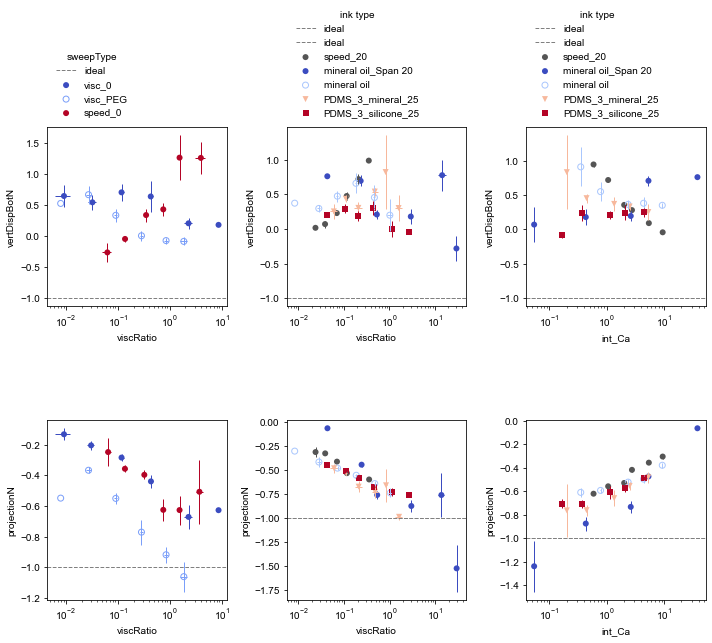

In [87]:
# vertDispBotN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
# projectionN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
ss1 = vs.copy()
ss1 = ss1.sort_values(by='sigma')
ss1 = ss1[ss1.ink_days==1]
mp.simplifyType(ss1)
ssca = ss1[ss1.sigma>0]
sslap = ss1[ss1.sigma==0]
cmap = cm.get_cmap('coolwarm') 
fig,axs = plt.subplots(2,3,figsize=(10,10))
for k,ss0 in enumerate([sslap, ssca]):
    for i,s2 in enumerate(['viscRatio', 'int_Ca'][0:k+1]):
        for j,s in enumerate(['vertDispBotN', 'projectionN']):
            mp.sweepTypeSS(ss0, s2, s, logx=True, yideal=[-1, -1][j], ax=axs[j][i+k], fig=fig, legend=(j==0), dx=0.2)
fig.tight_layout()

C:\Users\lmf1\Miniconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\lmf1\Miniconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


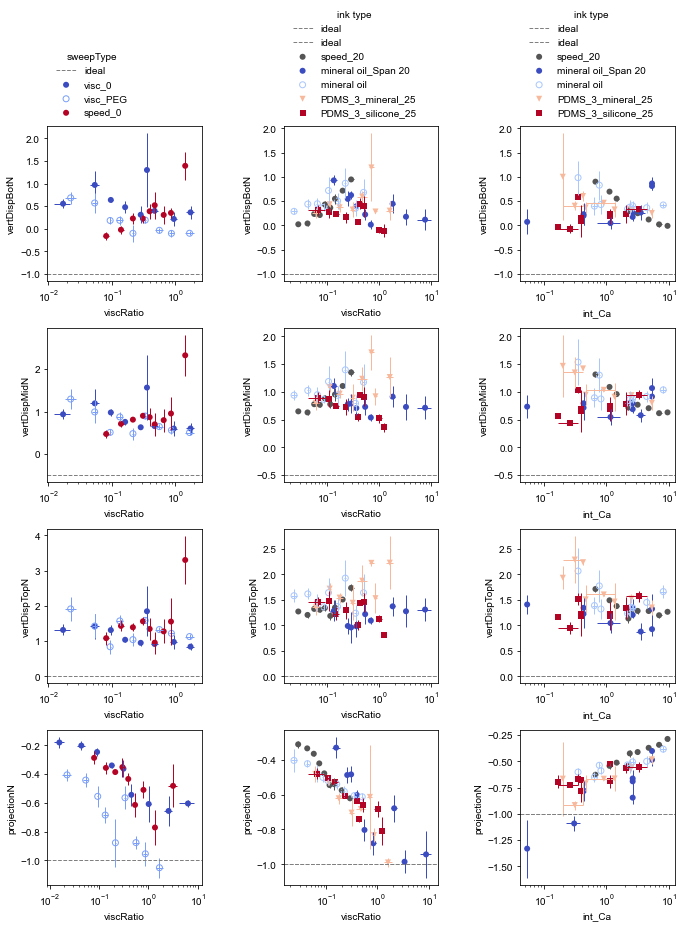

In [26]:
# vertDispBotN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
# projectionN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
ss1 = vs.copy()
ss1 = ss1.sort_values(by='sigma')
ss1 = ss1[ss1.ink_days==1]
ssca = ss1[ss1.sigma>0]
mp.simplifyType(ssca)
sslap = ss1[ss1.sigma==0]
mp.simplifyType(sslap)
cmap = cm.get_cmap('coolwarm') 
fig,axs = plt.subplots(4,3,figsize=(10,13))
for k,ss0 in enumerate([sslap, ssca]):
    for i,s2 in enumerate(['viscRatio', 'int_Ca'][0:k+1]):
        for j,s in enumerate(['vertDispBotN', 'vertDispMidN', 'vertDispTopN', 'projectionN']):
            mp.sweepTypeSS(ss0, s2, s, logx=True, yideal=[-1, -0.5, 0, -1][j], ax=axs[j][i+k], fig=fig, legend=(j==0), dx=0.1)
fig.tight_layout()

(<Figure size 432x288 with 0 Axes>,
 <AxesSubplot:xlabel='viscRatio', ylabel='vertDispBotN'>)

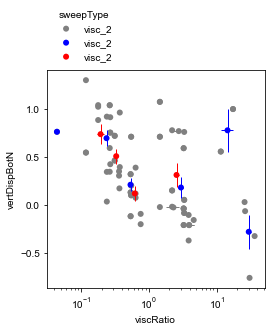

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [23]:
fig,ax = plt.subplots(1,1)
mp.scatterSS(ssca[ssca.sweepType=='visc_2'], 'viscRatio', 'vertDispBotN', 'sweepType', dx=0, dy=0, logx=True, grid=False, color='gray', ax=ax)
mp.scatterSS(ssca[ssca.sweepType=='visc_2'], 'viscRatio', 'vertDispBotN', 'sweepType', dx=0.2, dy=1, logx=True, grid=True, color='blue', ax=ax)
mp.scatterSS(ssca[ssca.sweepType=='visc_2'], 'viscRatio', 'vertDispBotN', 'sweepType', dx=0.2, dy=1, logx=True, grid=False, color='red', ax=ax)


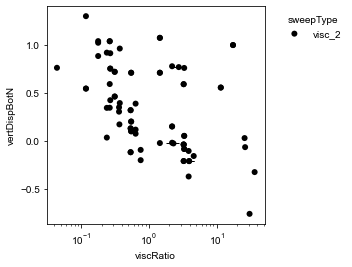

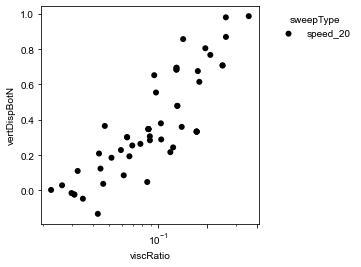

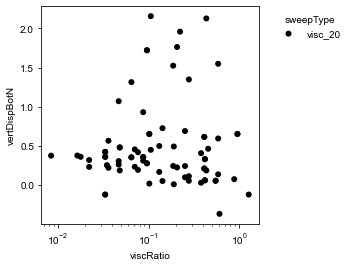

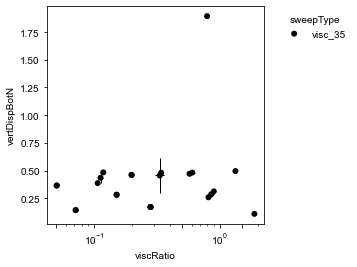

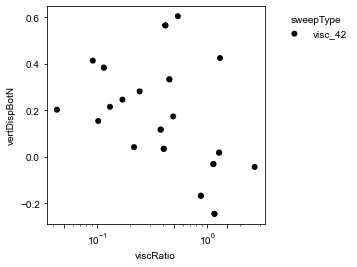

In [12]:
for st in ssca.sweepType.unique():
    mp.scatterSS(ssca[ssca.sweepType==st], 'viscRatio', 'vertDispBotN', 'sweepType', dx=0, dy=0, logx=True)

In [13]:
ssca[(ssca.sweepType=='visc_35')&(ssca.vertDispBotN>1.5)]

,folder,bn,date,sigma,di,do,fluFile,calibFile,viscRatio,vRatio,...,projShiftN_N,vertDispBotN,vertDispBotN_SE,vertDispBotN_N,vertDispTopN,vertDispTopN_SE,vertDispTopN_N,vertDispMidN,vertDispMidN_SE,vertDispMidN_N
194,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_PDMSM5_S_2.25_210630,210630,35,0.6,0.91,True,True,0.79,1.0,...,13.0,1.89,1.09,3.0,2.16,1.17,3.0,2.03,1.13,3.0


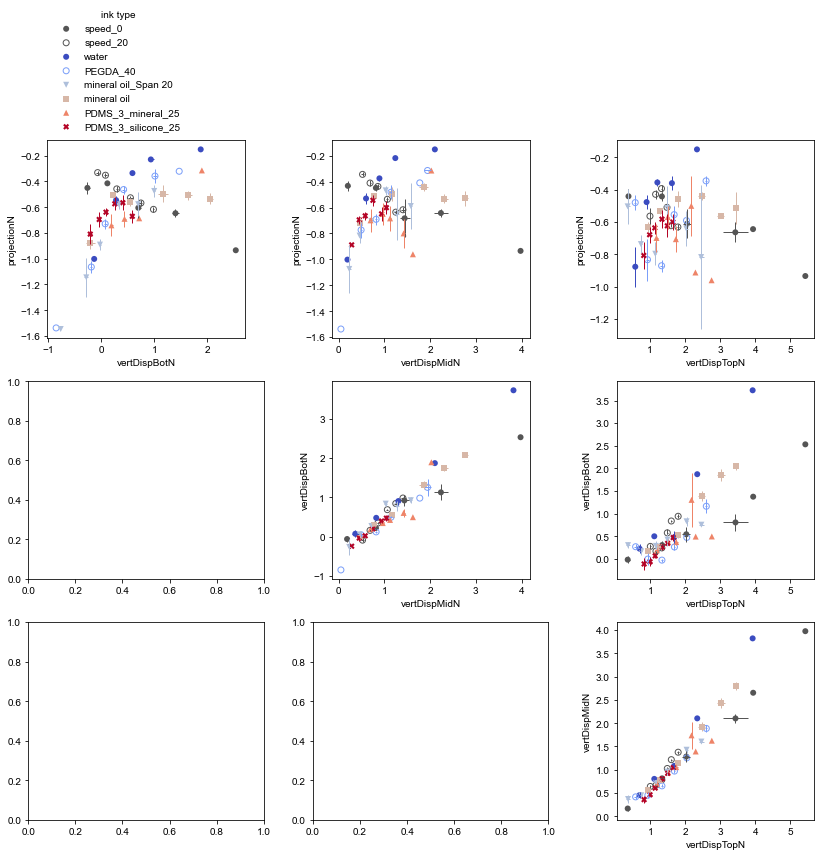

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [83]:
fig,axs = plt.subplots(3,3, figsize=(12, 12))
vs1 = vs.copy()
vs1.sort_values(by='sigma', inplace=True)
mp.simplifyType(vs1)
sl = ['projectionN', 'vertDispBotN', 'vertDispMidN', 'vertDispTopN']
for i,xvar in enumerate(sl):
    for j,yvar in enumerate(sl[0:i]):
        mp.sweepTypeSS(vs1, xvar, yvar, dx=0.2, ax=axs[j][i-1], legend=((i==1)&(j==0)))
fig.tight_layout()

In [38]:
vs1[(vs1.sweepType=='visc_2')&(vs1.vertDispBotN>0.5)&(vs1.viscRatio>10)][['bn', 'viscRatio', 'vertDispBotN', 'projectionN']]

,bn,viscRatio,vertDispBotN,projectionN
138,I_M5S_S_2.25T_211005,17.507732,0.997411,-0.361831
129,I_M4S_S_2.25T_211005,11.555566,0.554568,-0.749933


In [44]:
vs[(vs.sweepType=='speed_0_low_visc_ratio')&(vs1.vertDispBotN<-1)][['bn', 'vRatio', 'viscRatio', 'vertDispBotN', 'projectionN']]

,bn,vRatio,viscRatio,vertDispBotN,projectionN
278,I_2.75_S_2.75_VI_2.5_VS_7.5_210921,0.333333,0.729734,-1.348175,NaN
280,I_2.75_S_2.75_VI_5_VS_10_210921,0.500000,0.516760,-1.527136,NaN
